<a href="https://colab.research.google.com/github/divshacker1010/kaggle-Submissions/blob/main/housePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

test_ids = test_data['Id']

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
def clean_data(train_data):
  train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
  train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)
  train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
  train_data['Electrical'] = train_data['Electrical'].fillna('SBrkr')
  # train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())
  train_data = train_data.drop(['Id','GarageYrBlt','3SsnPorch','GarageArea','BsmtUnfSF','Condition2','RoofMatl','Exterior2nd','BsmtFinType2','Heating'], axis=1, inplace=True)
  return train_data

clean_data(train_data)

In [ ]:
def clean_data_test(test_data):
  test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
  test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)
  test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')
  test_data['Electrical'] = test_data['Electrical'].fillna('SBrkr')
  # test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median())
  test_data = test_data.drop(['Id','GarageYrBlt','3SsnPorch','GarageArea','BsmtUnfSF','Condition2','RoofMatl','Exterior2nd','BsmtFinType2','Heating'], axis=1, inplace=True)
  return test_data

clean_data(test_data)

In [ ]:

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

def preprocess_data(train_data):
  MSZoning = ['A','I','C','RH','RM','FV','RL','RP']
  Street = ['Grvl','Pave']
  Alley = ['None','Grvl','Pave']
  LotShape =['IR3','IR2','IR1','Reg']
  LandContour = ['Low','HLS','Bnk','Lvl']
  Utilities = ['Elo','NoSeWa','NoSewr','AllPub']
  LotConfig = ['Inside','Corner','CulDSac','FR2','FR3']
  LandSlope = ['Sev','Mod','Gtl']
  Condition1 = ['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe']
  BldgType = ['1Fam','2fmCon','Duplex','TwnhsE','TwnhsI']
  HouseStyle = ['1Story','1.5Unf','1.5Fin','2.5Unf','2.5Fin','SFoyer','SLvl']
  RoofStyle = ['Flat','Gable','Gambrel','Hip','Mansard','Shed']
  MasVnrType = ['None','BrkCmn','BrkFace','Stone','CinderBlock']
  ExterQual = ['Po','Fa','TA','Gd','Ex']
  ExterCond = ['Po','Fa','TA','Gd','Ex']
  Foundation = ['PConc','CBlock','BrkTil','Stone','Slab','Wood']
  BsmtQual = ['NA','Po','Fa','TA','Gd','Ex']
  BsmtCond = ['NA','Po','Fa','TA','Gd','Ex']
  BsmtExposure = ['NA','No','Mn','Av','Gd']
  BsmtFinType1 = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
  HeatingQC = ['Po','Fa','TA','Gd','Ex']
  CentralAir = ['N','Y']
  Electrical = ['Mix','FuseP','FuseF','FuseA','SBrkr']
  KitchenQual = ['Po','Fa','TA','Gd','Ex']
  Functional = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
  FireplaceQu = ['NA','Po','Fa','TA','Gd','Ex']
  GarageType = ['NA','Detchd','CarPort','BuiltIn','Basment','Attchd','2Types']
  GarageFinish = ['NA','Unf','RFn','Fin']
  GarageQual = ['NA','Po','Fa','TA','Gd','Ex']
  GarageCond = ['NA','Po','Fa','TA','Gd','Ex']
  PavedDrive = ['N','P','Y']
  PoolQC = ['NA','Fa','TA','Gd','Ex']
  Fence = ['NA','MnWw','GdWo','MnPrv','GdPrv']
  MiscFeature = ['NA','Elev','Gar2','Othr','Shed','TenC']
  SaleType = ['Oth','ConLD','ConLI','ConLw','Con','COD','New','VWD','CWD','WD']
  SaleCondition = ['AdjLand', 'Abnorml', 'Alloca', 'Family', 'Normal', 'Partial']

  cols=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Condition1','BldgType','HouseStyle','RoofStyle','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
  for col in cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])
    print(le.classes_)
  # train_data.head()

preprocess_data(train_data)
preprocess_data(test_data)

['C (all)' 'FV' 'RH' 'RL' 'RM' nan]
['Grvl' 'Pave']
['Grvl' 'Pave' nan]
['IR1' 'IR2' 'IR3' 'Reg']
['Bnk' 'HLS' 'Low' 'Lvl']
['AllPub' nan]
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
['Gtl' 'Mod' 'Sev']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
['1.5Fin' '1.5Unf' '1Story' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
['BrkCmn' 'BrkFace' 'None' 'Stone']
['Ex' 'Fa' 'Gd' 'TA']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['BrkTil' 'CBlock' 'PConc' 'Slab' 'Stone' 'Wood']
['Ex' 'Fa' 'Gd' 'TA' nan]
['Fa' 'Gd' 'Po' 'TA' nan]
['Av' 'Gd' 'Mn' 'No' nan]
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf' nan]
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['N' 'Y']
['FuseA' 'FuseF' 'FuseP' 'SBrkr']
['Ex' 'Fa' 'Gd' 'TA' nan]
['Maj1' 'Maj2' 'Min1' 'Min2' 'Mod' 'Sev' 'Typ' nan]
['Ex' 'Fa' 'Gd' 'Po' 'TA' nan]
['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' nan]
['Fin' 'RFn' 'Unf' nan]
['Fa' 'Gd' 'Po' 'TA' nan]
['Ex' 'Fa' 'Gd' 'Po' 'TA' 

In [ ]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000


In [ ]:
mask = train_data.applymap(lambda x: isinstance(x, str))
print(mask.any().any())

False


In [ ]:
mask2 = test_data.applymap(lambda x: isinstance(x, str))
print(mask2.any().any())

False


In [ ]:
frequency_encoded_exterior = train_data['Exterior1st'].value_counts()
train_data['Exterior1st'] = train_data['Exterior1st'].map(frequency_encoded_exterior)

frequency_encoded_Neighborhood = train_data['Neighborhood'].value_counts()
train_data['Neighborhood'] = train_data['Neighborhood'].map(frequency_encoded_Neighborhood)

In [ ]:
frequency_encoded_exterior = test_data['Exterior1st'].value_counts()
test_data['Exterior1st'] = test_data['Exterior1st'].map(frequency_encoded_exterior)

frequency_encoded_Neighborhood = test_data['Neighborhood'].value_counts()
test_data['Neighborhood'] = test_data['Neighborhood'].map(frequency_encoded_Neighborhood)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y=train_data['SalePrice']
X= train_data.drop('SalePrice' , axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf= RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 777395304.8091456
R-squared: 0.8986489904326724


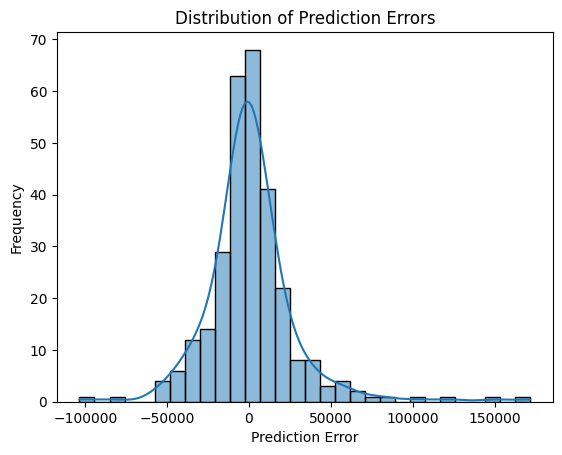

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate errors
errors = y_test - y_pred

# Plot the distribution of errors
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


In [ ]:
# Check for missing values across all columns
missing_values = test_data.isnull().sum()

# Display all columns with missing values
print(missing_values[missing_values > 0])

Exterior1st     1
BsmtFinSF1      1
BsmtFinSF2      1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
dtype: int64


In [ ]:
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])

In [ ]:
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2'] = test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())

In [ ]:
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mean())
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mean())
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data['GarageCars'].mean())

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   Alley          1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  BldgType       1459 non-null   int64  
 14  HouseStyle     1459 non-null   int64  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
final = rf.predict(test_data)

In [ ]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': final})
submission.to_csv('submission.csv', index=False)
